In [1]:
import sympy as sp

# Define the symbolic variables
t, gamma, omega, omega_0 = sp.symbols('t gamma omega omega_0')  # time, damping factor, angular frequencies
A, B = sp.symbols('A B')  # Amplitude constants
F_0, m = sp.symbols('F_0 m')  # Force amplitude and mass


In [2]:
# Define omega_gamma
omega_gamma = sp.sqrt(omega_0**2 - gamma**2)

# Define the transient solution Q_transient
Q_transient = A * sp.exp(-gamma * t) * sp.cos(omega_gamma * t) + B * sp.exp(-gamma * t) * sp.sin(omega_gamma * t)

Q_transient


A*exp(-gamma*t)*cos(t*sqrt(-gamma**2 + omega_0**2)) + B*exp(-gamma*t)*sin(t*sqrt(-gamma**2 + omega_0**2))

In [3]:
# Define the steady-state solution
phi = sp.symbols('phi')  # phase shift
C_bar = sp.symbols('C_bar')  # steady-state amplitude

# Define the steady-state equation Q_steady
Q_steady = C_bar * sp.cos(omega * t - phi)

Q_steady


C_bar*cos(omega*t - phi)

In [4]:
# Expression for C_bar
C_bar_expr = (F_0 / m) / sp.sqrt((omega_0**2 - omega**2)**2 + (4 * gamma**2 * omega**2))

# Expression for tan(phi)
tan_phi_expr = (2 * gamma * omega) / (omega_0**2 - omega**2)

C_bar_expr, tan_phi_expr


(F_0/(m*sqrt(4*gamma**2*omega**2 + (-omega**2 + omega_0**2)**2)),
 2*gamma*omega/(-omega**2 + omega_0**2))

In [5]:
# Simplify the expressions
C_bar_simplified = sp.simplify(C_bar_expr)
tan_phi_simplified = sp.simplify(tan_phi_expr)

C_bar_simplified, tan_phi_simplified


(F_0/(m*sqrt(4*gamma**2*omega**2 + (omega**2 - omega_0**2)**2)),
 -2*gamma*omega/(omega**2 - omega_0**2))

C:\Users\Sarah Sweeney\AppData\Local\Temp\ipykernel_24104\2665989471.py:18: RuntimeWarning: divide by zero encountered in divide
  return np.arctan((2 * gamma_val * omega_val) / (omega_0_val**2 - omega_val**2))


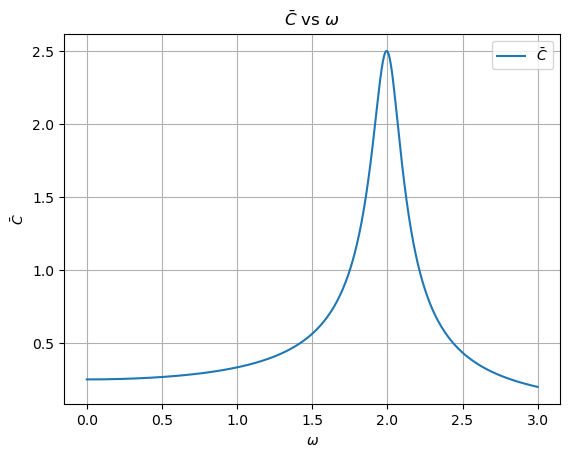

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters for plotting
gamma_val = 0.1  # Damping factor
omega_0_val = 2.0  # Natural frequency
F_0_val = 1.0  # Force amplitude
m_val = 1.0  # Mass

# Create an array of omega values for plotting
omega_vals = np.linspace(0, 3, 400)

# Define functions to calculate C_bar and phi numerically
def C_bar_func(omega_val):
    return (F_0_val / m_val) / np.sqrt((omega_0_val**2 - omega_val**2)**2 + 4 * gamma_val**2 * omega_val**2)

def phi_func(omega_val):
    return np.arctan((2 * gamma_val * omega_val) / (omega_0_val**2 - omega_val**2))

# Calculate C_bar and phi for the range of omega values
C_bar_vals = C_bar_func(omega_vals)
phi_vals = phi_func(omega_vals)

# Plot C_bar
plt.figure()
plt.plot(omega_vals, C_bar_vals, label=r'$\bar{C}$')
plt.title(r'$\bar{C}$ vs $\omega$')
plt.xlabel(r'$\omega$')
plt.ylabel(r'$\bar{C}$')
plt.legend()
plt.grid(True)
plt.show()


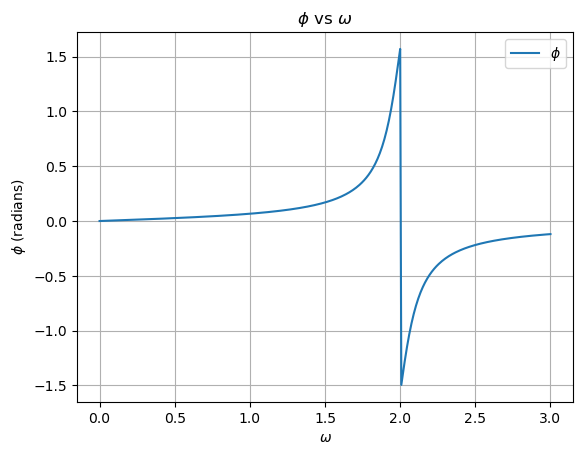

In [7]:
# Plot phi
plt.figure()
plt.plot(omega_vals, phi_vals, label=r'$\phi$')
plt.title(r'$\phi$ vs $\omega$')
plt.xlabel(r'$\omega$')
plt.ylabel(r'$\phi$ (radians)')
plt.legend()
plt.grid(True)
plt.show()
